# [Aman's AI Journal](https://aman.ai) | Primers | Matplotlib Tutorial

## Introduction

- [Matplotlib](http://matplotlib.org/) is a plotting library.
- This tutorial offers a brief overview of the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB (which is where Matplotlib gets its name from!).
- Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc. When running python using the command line, the graphs are typically shown in a separate window. In a Jupyter/Colab notebook, we can simply output the graphs within the notebook itself by running the `%matplotlib inline` magic command.
- Run this cell if you're viewing this in Colab:

In [1]:
%matplotlib inline

## Plotting 2D data

### Python lists

- The most important function in the `matplotlib.pyplot` module is `plot`, which allows you to plot 2D data. Here is a simple example:

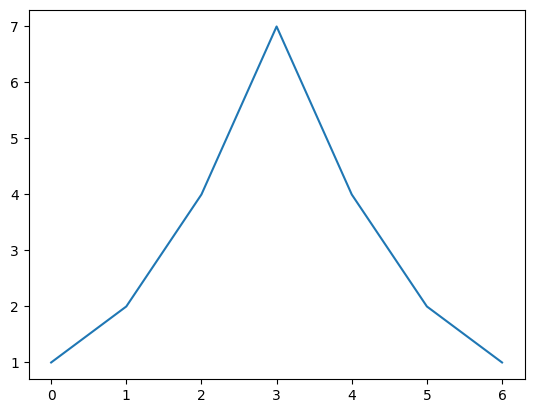

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 7, 4, 2, 1])
plt.show() # You must call plt.show() to render your final plot.

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/1.jpg?raw=1)

- In the above example, we simply called the `plot` function with some data, and then called the `show` function to render your plot onto the screen.
- Note that if the `plot` function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate.
- You can also provide **two arrays**: one for the horizontal axis `x`, and the second for the vertical axis `y`:

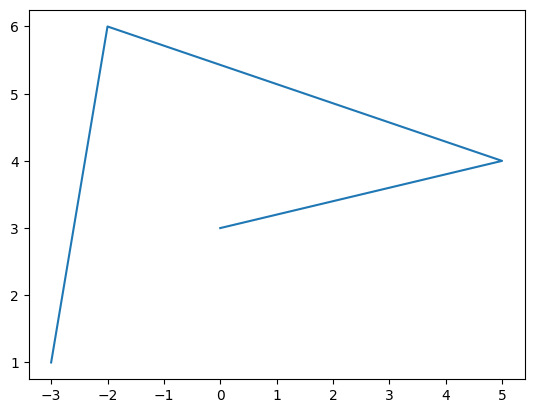

In [3]:
import matplotlib.pyplot as plt

plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/2.jpg?raw=1)

### NumPy arrays

- You can plot NumPy arrays using Matplotlib using the same syntax as what we saw earlier with Python lists.
- Note that by default, Matplotlib connects **consecutive points** with a **line** when drawing a "vanilla" 2D plot (using the `plot` function). Since we're looking to view the vectors in isolation (and not by connecting them together with a line), we utilize a scatter plot (using the `scatter` function) which helps observe data points individually.

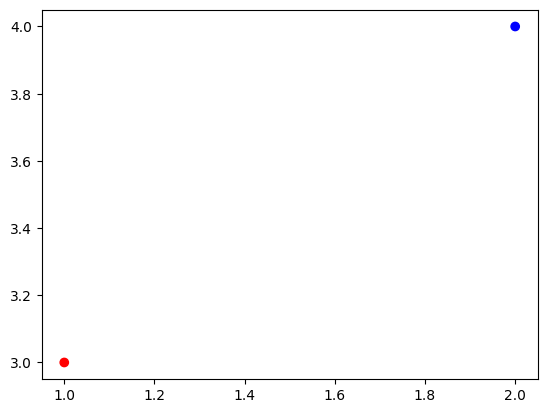

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2])
y = np.array([3, 4])
plt.scatter(x, y, color=["r","b"]) # Read more on the color argument in the examples section below.
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/2a.jpg?raw=1)

### 2D vectors

- To plot 2D vectors using Matplotlib, we use Python's inbuilt `zip()` function which aggregates elements from its inputs by returning an iterator of tuples where the \\(i^{th}\\) tuple contains the \\(i^{th}\\) element from each of the input iterables. To read more about the `zip()` function, refer our [Python tutorial](../python3).
- Using `zip()`, we populate lists with the X and Y components of the vectors \\(u\\) and \\(v\\):

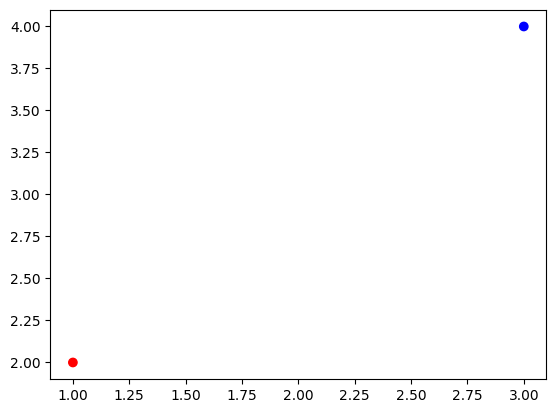

In [5]:
import matplotlib.pyplot as plt
import numpy as np

u = np.array([1, 2])
v = np.array([3, 4])
x, y = zip(u, v)
plt.scatter(x, y, color=["r","b"])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/2b.jpg?raw=1)

- Since vectors are usually represented with arrows, let's create a quick convenience function to draw arrows for the vectors \\(u\\) and \\(v\\):

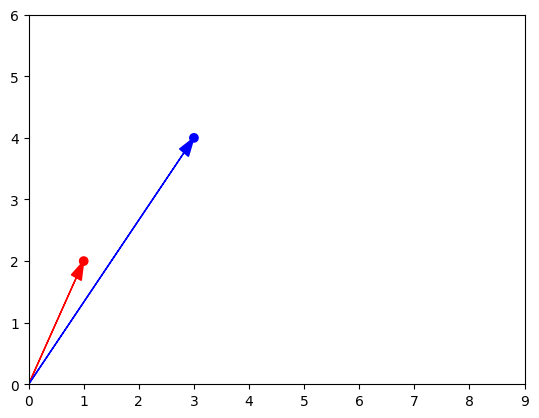

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1], head_width=0.2,
           head_length=0.3, length_includes_head=True, **options)

u = np.array([1, 2])
v = np.array([3, 4])
x, y = zip(u, v)
plt.scatter(x, y, color=["r","b"])
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6]) # Read more on the axis argument in "Axes extents" section below.
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/2c.jpg?raw=1)

### Examples

- Now, let's plot a mathematical function. We use NumPy's `linspace` function (to learn more about NumPy and its `linspace` function, refer to our [NumPy tutorial](../numpy)) to create an array `x` containing \\(500\\) floats ranging from \\(-2\\) to \\(2\\), then we create a second array `y` computed as the square of `x`.

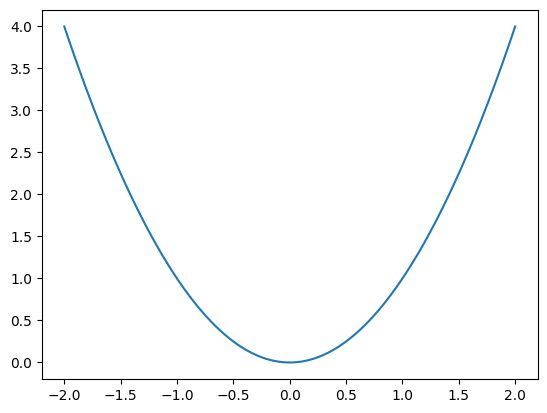

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/4.jpg?raw=1)

- And here's how you can get a sine wave:

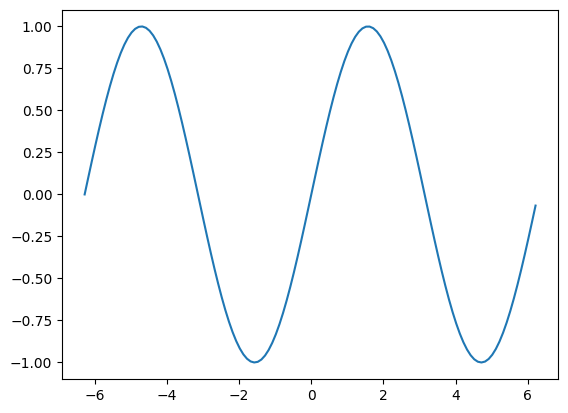

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the X and Y coordinates for points on a sine curve
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/sine.jpg?raw=1)

## Plotting 3D data

- Plotting 3D vectors is relatively straightforward using Matplotlib's `Axes3D`.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/3d1.jpg?raw=1)

- To make visualization of the two vectors easier, let's add vertical "grounding" lines by creating a quick convenience function to plot a list of 3D vectors with vertical lines attached:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/3d2.jpg?raw=1)

## Axes extents

- The axes in Matplotlib plots **automatically match** the extent of the data.
- If we wish to override the axes extents of plots, for e.g., to give the graph a bit more room, we can call the `axis` function to change the extent of each axis with `[xmin, xmax, ymin, ymax]`.

In [ ]:
import matplotlib.pyplot as plt

plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0, 7])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/3.jpg?raw=1)

## Additional plot attributes

- With just a little bit of extra work we can superimpose multiple lines on the same graph, add a title, legend, axis labels and draw a grid:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the X and Y coordinates for points on sine and cosine curves
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)

# Axes labels
plt.xlabel('Radians')
plt.ylabel('Magnitude')

# Custom X and Y axis limits
plt.xlim(np.ceil(-2*np.pi), np.floor(2*np.pi))
plt.ylim(-1, 1)

# Add a plot title
plt.title('Sine and Cosine')

# Add a legend
plt.legend(['Sine', 'Cosine'])

# Show the grid
plt.grid() # Same effect as plt.grid(True)

plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/sine_cosine.jpg?raw=1)

- For more on the `plot` function, refer the [Matplotlib documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

## Line style and colors

- Let's start with a plot that contains several points connected together with straight lines:

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 100, 100, 0, 0, 100, 0, 100], [0, 0, 100, 100, 0, 100, 100, 0])
plt.axis([-10, 110, -10, 110])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/5.jpg?raw=1)

- Overriding the `linestyle` (or `ls`) argument changes the line's style. The three most common linestyles are `-` (or `solid`) for a solid line, `--` (or `dashed`) for a dashed line, and `:` (or `dotted`) for a dotted line.

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 100, 100, 0, 0, 100, 0, 100], [0, 0, 100, 100, 0, 100, 100, 0], ls="--")
plt.axis([-10, 110, -10, 110])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/6.jpg?raw=1)

- Overriding the `color` argument changes the line's color.

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 100, 100, 0, 0, 100, 0, 100], [0, 0, 100, 100, 0, 100, 100, 0], ls="--", color="purple")
plt.axis([-10, 110, -10, 110])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/7.jpg?raw=1)

- To define linestyle and color all rolled into one argument, send in a third positional argument over to `plot()`. In the below code snippet, `"g--"` means "green dashed line".

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 100, 100, 0, 0, 100, 0, 100], [0, 0, 100, 100, 0, 100, 100, 0], "g--")
plt.axis([-10, 110, -10, 110])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/8.jpg?raw=1)

- To plot multiple lines on one graph, just pass in multiple `x` and `y` arrays (and optionally, their respective styles) as: `x1, y1, [style1], x2, y2, [style2], ...`

For example:

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 100, 0, 100], [0, 100, 100, 0], "g--", [0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-")
plt.axis([-10, 110, -10, 110])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/9.jpg?raw=1)

- We can also achieve the same result as above by simply calling `plot` multiple times before calling `show`.

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 100, 0, 100], [0, 100, 100, 0], "g--")
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-")
plt.axis([-10, 110, -10, 110])
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/9.jpg?raw=1)

- You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2.0, 2.0, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/10.jpg?raw=1)

- Check out the [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for the full list of style and color options.

- The plot function returns a list of `Line2D` objects (one for each line). You can set extra attributes on these lines, such as the **line width**, the **dash style** or the **alpha level**.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2.0, 2.0, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/11.jpg?raw=1)

- For a full list of line properties and attributes, refer the [Matplotlib documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).

## Saving a figure

- Saving a figure to disk is as simple as calling [`savefig`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2.0, 2.0, 30)
plt.plot(x, x**2)
plt.show()

# Save figure
plt.savefig("my_square_function.png", transparent=True)

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/12.jpg?raw=1)

## Subplots

- A Matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the `subplot` function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from \\(1\\), then left to right, and top to bottom).
- Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the *active* subplot.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2.0, 2.0, 30)

plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/13.jpg?raw=1)

- Note that `subplot(223)` is a shorthand for `subplot(2, 2, 3)`.

- It is easy to create subplots that span across multiple grid cells like so:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/14.jpg?raw=1)

- If you need even more flexibility in subplot positioning, check out the [GridSpec documentation](http://matplotlib.org/users/gridspec.html).

- Here's an example that combines subplots with a couple of the other concepts (title, axes limits etc.) that we discussed earlier:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the X and Y coordinates for points on sine and cosine curves
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
# (2, 1, 1) thus indicates total number of rows, columns, and figure number respectively
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Custom X and Y axis limits for the first subplot
plt.xlim(np.ceil(-2*np.pi), np.floor(2*np.pi))
plt.ylim(-1,1)

# Set the second subplot as active, and make the second plot
plt.subplot(2, 1, 2)

plt.plot(x, y_cos)
plt.title('Cosine')

# Custom X and Y axis limits for the second subplot
plt.xlim(np.ceil(-2*np.pi), np.floor(2*np.pi))
plt.ylim(-1,1)

# Automatically adjust padding between subplots
# Optionally, pass in a float parameter to specify the amount of padding between subplots
plt.tight_layout()

# Show the figure.
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/sine_cosine_subplot.jpg?raw=1)

- You can read much more about the `subplot` function in the [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Adding text

- You can call `text` to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes.
- Any text in Matplotlib may contain TeX equation expressions, see the [Matplotlib documentation](http://matplotlib.org/users/mathtext.html) for more details.

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 30)
px = 1.414
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 3.0, "Square function\n$y = x^2$", fontsize=20, color='blue', horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/15.jpg?raw=1)

- Note: `ha` is an alias for `horizontalalignment`.
- For more text properties, refer the [Matplotlib documentation](http://matplotlib.org/users/text_props.html#text-properties).
- It is quite frequent to annotate elements of a graph, such as the beautiful point above. The `annotate` function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 30)
px = 1.414
py = px**2

plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.5, py+0.5),
             color="blue", weight="light", fontsize=14,
             arrowprops={"facecolor": "blue"})
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/16.jpg?raw=1)

- You can also add a bounding box around your text by using the `bbox` attribute:

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 30)
px = 1.414
py = px**2

plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 3.0, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/17.jpg?raw=1)

- Just for fun, if you want an [xkcd](http://xkcd.com)-style plot, just call `plt.xkcd()` before you do your plotting!

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 30)
px = 1.414
py = px**2

with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")
    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")
    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
    plt.text(0, 3.0, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)
    plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/18.jpg?raw=1)

- For more examples on xkcd plots, check ["XKCD Plots have Landed in Matplotlib!"](https://jakevdp.github.io/blog/2013/07/10/XKCD-plots-in-matplotlib/)

## Legends

- The simplest way to add a legend is to set a label on all lines, then just call the `legend` function.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/19.jpg?raw=1)

## Fonts

- To change the font size of the legend, axis title or plot title of a Matplotlib plot, override their respective `fontsize` arguments:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 50)
plt.plot(x, x**2, "r--", label="Square function")

# Add a legend
plt.legend(['Square plot'], fontsize=7)

# Set X and Y Labels
plt.xlabel('x', fontsize=12)
plt.ylabel('x^2', fontsize=12)

# Add a plot title
plt.title('Square function', fontsize=15)

plt.grid(True)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/29.jpg?raw=1)

- Note that with the above method you can set the font size for each plot attribute (legend, axis title, plot title etc.) individually at creation (allowing you to have multiple plots in the same Python source with different font sizes for each of their attributes).
- However, if you wish to set the same attributes for all plots in the same Python session/source, you can set the sizes calling the `rc` (runtime commands) method on Matplotlib:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 7
MEDIUM_SIZE = 10 # Default Matplotlib font size
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)         # Controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # Font size of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Font size of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # Font size of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # Font size of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Font size of the figure title

x = np.linspace(-2, 2, 50)
plt.plot(x, x**2, "r--", label="Square function")

# Add a legend
plt.legend(['Square plot'])

# Set X and Y Labels
plt.xlabel('x')
plt.ylabel('x^2')

# Add a plot title
plt.suptitle('Square function')

plt.grid(True)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/30.jpg?raw=1)

- For a full list of rcParams, refer the [Matplotlib documentation](https://matplotlib.org/tutorials/introductory/customizing.html).

## Non-linear scales

- Matplotlib supports non linear scales, such as logarithmic or logit scales.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/21.jpg?raw=1)
![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/22.jpg?raw=1)

## Histograms

- As an example:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/23.jpg?raw=1)

- Another example:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10

plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar hist') # default histtype='bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', histtype='step', label='step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/24.jpg?raw=1)

## Images

- You can use the `imshow` function to show images. Here is an example:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread, imresize

img = imread('cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

![](/assets/matplotlib/cat_tinted_imshow.jpg)

- It's just as easy to generate your own image:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = np.arange(100*100).reshape(100, 100)
plt.imshow(img)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/25.jpg?raw=1)

- As we did not provide RGB levels, the `imshow` function automatically maps values to a color gradient. By default, the color gradient goes from blue (for low values) to red (for high values), but you can select another color map. For e.g.:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = np.arange(100*100).reshape(100, 100)
plt.imshow(img, cmap="hot")
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/26.jpg?raw=1)

- You can also generate an RGB image directly:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = np.empty((20, 30, 3))

# 1, 0, 0 for the color red
img[:, :10] = [1, 0, 0]

# 0, 1, 0 for the color green
img[:, 10:20] = [0, 1, 0]

# 0, 0, 1 for the color blue
img[:, 20:] = [0, 0, 1]
plt.imshow(img)
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/27.jpg?raw=1)

- Since the `img` array is just quite small, i.e., of size \\(20 \times 30\\), when the `imshow` function displays it, it grows the image to the figure's size. Imagine stretching the original image, leaving blanks between the original pixels. How does `imshow` fill the blanks? By default, it just colors each blank pixel using the color of the nearest non-blank pixel. This technique can lead to pixelated images.
- If you prefer, you can use a different interpolation method, such as [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation) to fill the blank pixels. This leads to blurry edges, which many be nicer in some cases:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = np.empty((20,30,3))
img[:, :10] = [1, 0, 0]
img[:, 10:20] = [0, 1, 0]
img[:, 20:] = [0, 0, 1]
plt.imshow(img, interpolation="bilinear")
plt.show()

![](https://github.com/amanchadha/aman-ai/blob/master/assets/matplotlib/28.jpg?raw=1)

## References and Credits

- Aurélien Geron's [Notebook on Matplotlib](https://github.com/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb) and [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) served as a major inspiration for this tutorial.
- Parts of this tutorial were originally contributed by [Justin Johnson](http://cs.stanford.edu/people/jcjohns/).
- Stanford's [CS231N Python/Numpy Tutorial](https://cs231n.github.io/python-numpy-tutorial/).
- [Matplotlib documentation](https://matplotlib.org/api/index.html).
- [How to set the spacing between subplots in Matplotlib in Python](https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python)
- [Improve subplot size/spacing with many subplots in Matplotlib](https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib)
- [Why do many examples use `fig, ax = plt.subplots()` in Matplotlib/pyplot/python?](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)
- [How to change the font size on a matplotlib plot?](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)
- [How to change legend size with matplotlib.pyplot?](https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot)
- [PyPlot Legend only displaying one letter](https://stackoverflow.com/questions/44632571/pyplot-legend-only-displaying-one-letter)

## Citation

If you found our work useful, please cite it as:

```
@article{Chadha2020DistilledMatplotLibTutorial,
  title   = {MatplotLib Tutorial},
  author  = {Chadha, Aman},
  journal = {Distilled AI},
  year    = {2020},
  note    = {\url{https://aman.ai}}
}
```